1  Подготовка и исследование данных:
 - 1.1  Сontract
   - 1.1.1  Столбец 'TotalCharges'
   - 1.1.2  Столбцы 'BeginDate' и 'EndDate'
 - 1.2  Personal
 - 1.3  Internet и phone
 - 1.4  Объединение таблиц. заполнение пропусков
 - 1.5  Вывод
 
2  Анализ данных:
 - 2.1  Отток клиентов
 - 2.2  Ежемесячные платежи
 - 2.3  Типы услуг
 - 2.4  Тип оплаты за услуги
 - 2.5  Способы оплаты
 - 2.6  Пол и возраст
 - 2.7  Работающие и безработные
 - 2.8  Вывод

3  Подготовка данных к машинному обучению:
 - 3.1  Корреляция признаков
 - 3.2  Преобразование категориальных признаков
 - 3.3  Масштабирование признаков

4  Обучение моделей:
 - 4.1  Логистическая регрессия
 - 4.2  Случайный лес
 - 4.3  LGBM

5  Общий вывод

<h1>Анализ данных и предсказание оттока клиентов оператора связи<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Оператор связи «Н.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

<b><font size=5>Описание данных</font></b>

4 таблицы:

* `contract.csv` — информация о договоре
* `personal.csv` — персональные данные клиента
* `internet.csv` — информация об интернет-услугах
* `phone.csv` — информация об услугах телефонии


`contract.csv` - информация о договоре:

* `customerID` — уникальный ID клиента
* `BeginDate` — дата заключения договора
* `EndDate` — дата расторжения договора
* `Type` — тип оплаты за услуги (ежемесячный платёж или раз в год, несколько лет)
* `PaperlessBilling` — получает ли клиент электронный чек
* `PaymentMethod` — способы оплаты за услуги
* `MonthlyCharges` — ежемесячные платежи независимо от типа оплаты
* `TotalCharges` — общая сумма платежа клиента


`personal.csv` — информация о клиентах:

* `customerID` — уникальный ID клиента
* `gender` — пол клиента
* `Partner` — пожилой человек или нет
* `Dependents` — работает или нет

В `internet.csv` — интернет-услуги:

* `customerID` — уникальный ID клиента
* `InternetService` — варианты подключения интернет-соединения
* `OnlineSecurity` — услуга блокировки небезопасных сайтов 
* `OnlineBackup` — услуга облачного хранилища файлов
* `DeviceProtection` — наличие услуги антивируса
* `TechSupport` — услуга выделенной линии технической поддержки
* `StreamingTV` — услуга стримингового телевидения
* `StreamingMovies` — услуга каталога фильмов 

В `phone.csv` — информация об услугах телефонии:

* `customerID` — уникальный ID клиента
* `MultipleLines` — мультиканальная линия или нет.

# Подготовка и исследование данных

## Сontract 

In [1]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
sns.set()

In [2]:
def try_read(name):
    try:
        return(pd.read_csv('C:/Users/Professional/praktikum/jupyter/финальный/'+name, index_col='customerID'))
    except:
        return(pd.read_csv('/datasets/final_provider/'+name, index_col='customerID'))

contract = try_read('contract.csv')
internet = try_read('internet.csv')
personal = try_read('personal.csv')
phone = try_read('phone.csv')


Посмотрю данные:

In [3]:
contract.sample(20, random_state=1234)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
8591-NXRCV,2016-09-01,No,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65
0820-FNRNX,2018-09-01,No,Month-to-month,Yes,Mailed check,66.70,1077.05
4121-AGSIN,2015-04-01,No,One year,Yes,Credit card (automatic),24.50,1497.9
7767-UXAGJ,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,50.45,50.45
8775-CEBBJ,2019-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35
3170-GWYKC,2015-02-01,No,Month-to-month,Yes,Bank transfer (automatic),104.95,6236.75
0268-QKIWO,2019-09-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,19.75,58.85
4145-UQXUQ,2019-02-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,92.10,729.95
3704-IEAXF,2014-02-01,No,Two year,No,Credit card (automatic),53.65,3784


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


In [5]:
def info_col(df):
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            print('')
            print('Информация о столбце {}:'.format(i))
            print('')
            print(df[i].describe())
            print('')
            print('Количество пропусков в {}:'.format(i), df[i].isna().sum())
            if df[i].isna().sum() > 0:
                print('Доля пропущенных значений в {}:'.format(i), round(df[i].isna().sum() / df.shape[0] * 100, 2), '%')
            print('')
            print('Количество нулей в {}:'.format(i), (df[i] == 0).sum())
            if (df[i] == 0).sum() > 0:
                print('Доля нулей в {}:'.format(i), round((df[i] == 0).sum() / df.shape[0] * 100, 2), '%')
            print('')
            print('---')
        elif df[i].dtypes == 'object':   
            print('')
            print('Информация о столбце {}:'.format(i))
            print('')
            print('Уникальные значения {}:\n'.format(i), df[i].value_counts())
            print('')
            print('Пустые строки {}'.format(i), (df[i] == ' ').sum())
            print('')
            print('Количество NaN в {}:'.format(i), df[i].isna().sum())
            print('Доля пропущенных значений в {}:'.format(i),  round(df[i].isna().sum() / df.shape[0] * 100, 2), '%')
            print('')
            print('---')


In [6]:
info_col(contract)


Информация о столбце BeginDate:

Уникальные значения BeginDate:
 2014-02-01    366
2019-11-01    237
2019-09-01    237
2019-10-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

Пустые строки BeginDate 0

Количество NaN в BeginDate: 0
Доля пропущенных значений в BeginDate: 0.0 %

---

Информация о столбце EndDate:

Уникальные значения EndDate:
 No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Пустые строки EndDate 0

Количество NaN в EndDate: 0
Доля пропущенных значений в EndDate: 0.0 %

---

Информация о столбце Type:

Уникальные значения Type:
 Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Пустые строки Type 0

Количество NaN в Type: 0
Доля пропущенных значений в Type: 0.0 %

---

Информация

### Столбец 'TotalCharges'

Столбец 'TotalCharges' имеет пустые значения и тип данных object. Посмотрю записи, где пропущено это значение:

In [7]:
contract[contract['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


Дата заключения договора в таких записях равна дате выгрузки таблицы, удалю эти строки, тк они не несут прогностической ценности

In [8]:
contract = contract[contract['TotalCharges'] != ' ']
(contract['TotalCharges'] == ' ').sum()

0

Приведу 'TotalCharges' к типу вещественному данных

In [9]:
contract['TotalCharges'] = contract['TotalCharges'].astype(float)
contract.dtypes

BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

### Столбцы 'BeginDate' и 'EndDate'

На основании столбца 'EndDate' создам столбец с целевым признаком 

In [10]:
contract.loc[contract['EndDate'] == 'No', 'leftCompany'] = 0
contract.loc[contract['EndDate'] != 'No', 'leftCompany'] = 1

Приведу данные в 'BeginDate' и 'EndDate' к типу даты.
Значение No в 'EndDate' заменю датой выгрузки датасета.

In [11]:
contract['EndDate'] = contract['EndDate'].replace('No','2020-02-01')

In [12]:
contract['EndDate'] =  contract['EndDate'].apply(pd.to_datetime)

In [13]:
contract['BeginDate'] =  contract['BeginDate'].apply(pd.to_datetime)

Добавлю столбец со временем жизни абонента

In [14]:
contract['AmountOfDays'] = (contract['EndDate'] - contract['BeginDate']).dt.days # я думала не будет ли это утечкой данных
# но решила, что не будет, тк дата BeginDate и текущая дата будут известны для любых новых данных.

In [15]:
contract.head(5)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,leftCompany,AmountOfDays
customerID,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0.0,1036
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1.0,61
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,1371
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1.0,61


## Personal

In [16]:
personal.sample(10, random_state=12345)

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
0098-BOWSO,Male,0,No,No
9992-RRAMN,Male,0,Yes,No
8380-PEFPE,Male,0,No,Yes
9773-PEQBZ,Male,0,No,No
8319-QBEHW,Male,0,No,Yes
3392-EHMNK,Female,0,Yes,Yes
6486-LHTMA,Female,1,Yes,No
0883-EIBTI,Female,0,No,No
6122-EFVKN,Male,0,No,Yes


In [17]:
info_col(personal)


Информация о столбце gender:

Уникальные значения gender:
 Male      3555
Female    3488
Name: gender, dtype: int64

Пустые строки gender 0

Количество NaN в gender: 0
Доля пропущенных значений в gender: 0.0 %

---

Информация о столбце SeniorCitizen:

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

Количество пропусков в SeniorCitizen: 0

Количество нулей в SeniorCitizen: 5901
Доля нулей в SeniorCitizen: 83.79 %

---

Информация о столбце Partner:

Уникальные значения Partner:
 No     3641
Yes    3402
Name: Partner, dtype: int64

Пустые строки Partner 0

Количество NaN в Partner: 0
Доля пропущенных значений в Partner: 0.0 %

---

Информация о столбце Dependents:

Уникальные значения Dependents:
 No     4933
Yes    2110
Name: Dependents, dtype: int64

Пустые строки Dependents 0

Количество NaN в Dependents: 0
Доля пропущенных знач

Данные выглядят нормально

## Internet и phone

In [18]:
internet.sample(10, random_state=12345)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7823-JSOAG,Fiber optic,No,No,No,No,No,No
4450-YOOHP,DSL,No,No,Yes,No,Yes,Yes
2498-XLDZR,DSL,Yes,Yes,Yes,Yes,No,Yes
7905-TVXTA,DSL,Yes,No,No,Yes,Yes,No
9802-CAQUT,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
3387-VATUS,Fiber optic,No,No,No,No,Yes,Yes
2845-AFFTX,Fiber optic,No,No,Yes,No,Yes,Yes
0853-NWIFK,Fiber optic,Yes,Yes,No,No,Yes,Yes
0973-KYVNF,DSL,Yes,Yes,Yes,No,Yes,No


In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


In [20]:
info_col(internet)


Информация о столбце InternetService:

Уникальные значения InternetService:
 Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

Пустые строки InternetService 0

Количество NaN в InternetService: 0
Доля пропущенных значений в InternetService: 0.0 %

---

Информация о столбце OnlineSecurity:

Уникальные значения OnlineSecurity:
 No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

Пустые строки OnlineSecurity 0

Количество NaN в OnlineSecurity: 0
Доля пропущенных значений в OnlineSecurity: 0.0 %

---

Информация о столбце OnlineBackup:

Уникальные значения OnlineBackup:
 No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

Пустые строки OnlineBackup 0

Количество NaN в OnlineBackup: 0
Доля пропущенных значений в OnlineBackup: 0.0 %

---

Информация о столбце DeviceProtection:

Уникальные значения DeviceProtection:
 No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

Пустые строки DeviceProtection 0

Количество NaN в DeviceProtection: 0
Дол

Количество интернет пользователей примерно 2/3 от общего количества

In [21]:
phone.sample(5, random_state=12345)

,MultipleLines
customerID,
8966-KZXXA,Yes
7206-PQBBZ,No
4567-AKPIA,Yes
7047-YXDMZ,No
7619-PLRLP,Yes


In [22]:
info_col(phone)


Информация о столбце MultipleLines:

Уникальные значения MultipleLines:
 No     3390
Yes    2971
Name: MultipleLines, dtype: int64

Пустые строки MultipleLines 0

Количество NaN в MultipleLines: 0
Доля пропущенных значений в MultipleLines: 0.0 %

---


## Объединение таблиц. заполнение пропусков 

In [23]:
res = contract.join(personal).join(internet).join(phone)
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   datetime64[ns]
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   leftCompany       7032 non-null   float64       
 8   AmountOfDays      7032 non-null   int64         
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   object        
 12  Dependents        7032 non-null   object        
 13  InternetService   5512 non-null   object        
 14  OnlineSecurity

Добавлю столбец с типом услуги, которую использует абонент: интернет, телефония или и то и другое

In [24]:
res.loc[res['InternetService'].isnull(), 'TypeService'] = 'internet'
res.loc[res['MultipleLines'].isnull(), 'TypeService'] = 'phone'
res['TypeService'].fillna('both', inplace=True)

In [25]:
res.fillna(0, inplace=True)

In [26]:
res.sample(10, random_state=12345)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,leftCompany,AmountOfDays,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TypeService
customerID,,,,,,,,,,,,,,,,,,,,,,
6322-PJJDJ,2016-01-01,2020-02-01,Two year,Yes,Electronic check,94.80,4690.65,0.0,1492,Male,0,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,No,both
1262-OPMFY,2019-02-01,2019-11-01,Month-to-month,Yes,Bank transfer (automatic),75.75,655.90,1.0,273,Female,0,Yes,No,Fiber optic,No,No,Yes,No,No,No,No,both
1734-ZMNTZ,2019-03-01,2020-02-01,Two year,No,Mailed check,25.00,300.70,0.0,337,Female,0,Yes,Yes,0,0,0,0,0,0,0,Yes,internet
7109-MFBYV,2017-12-01,2020-02-01,Month-to-month,No,Electronic check,45.45,1233.15,0.0,792,Male,0,No,No,DSL,No,No,No,No,No,No,No,both
8929-KSWIH,2018-01-01,2020-02-01,Two year,No,Bank transfer (automatic),99.30,2513.50,0.0,761,Male,0,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,No,both
6848-HJTXY,2014-10-01,2020-02-01,Two year,No,Credit card (automatic),19.45,1208.60,0.0,1949,Female,0,Yes,No,0,0,0,0,0,0,0,No,internet
2237-ZFSMY,2016-09-01,2019-12-01,One year,Yes,Electronic check,95.55,3692.85,1.0,1186,Female,0,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,No,No,both
6689-VRRTK,2016-06-01,2020-02-01,One year,Yes,Credit card (automatic),109.80,4860.35,0.0,1340,Female,1,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Yes,both
0337-CNPZE,2016-06-01,2019-11-01,Month-to-month,Yes,Electronic check,106.30,4443.45,1.0,1248,Female,0,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,both


## Вывод

Входе исследовательского анализа данных изучила представленные датасеты, определила типы данных, общую информацию о полях, пропусках, дубликатах. В столбце «TotalCharges» обнаружила 11 пропусков, удалила эти строки, т.к. дата договора в них равна дате выгрузки датасета и восполнить информацию невозможно. 

Привела данные к необходимым типам: «TotalCharges» в вещественному числу, столбцы с датами к типу datetime64.

Добавила столбец с целевым признаком – «leftCompany», покинул клиент компанию или нет. И столбец «AmountOfDays» с длительностью прибывания в компании для всех клиентов.

Объединила все таблицы по ID пользователя.


# Анализ данных

## Отток клиентов

In [27]:
def bin_pie(vals, labels, title):
    explode = []
    for i in range(len(vals)):
        explode.append(0.1)
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, colors = ['#1c4297', '#43c5dd', '#006bb3'])
    ax.axis()
    plt.title(title)

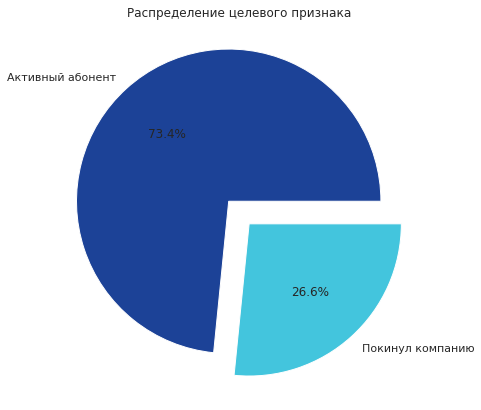

In [28]:
bin_pie(res['leftCompany'].value_counts(), ["Активный абонент", "Покинул компанию"], 'Распределение целевого признака')

Для дальнейшего исследования разделю данные на две выборки:

In [29]:
left = res.loc[res['leftCompany'] == 1]
stayed = res.loc[res['leftCompany'] == 0]

Посмотрю в какие периоды времени сколько клиентов покинуло компанию:

In [30]:
left.pivot_table(index='EndDate', values='leftCompany', aggfunc='count')

,leftCompany
EndDate,
2019-10-01,458
2019-11-01,485
2019-12-01,466
2020-01-01,460


Отток клиентов начался с ноября 2019 года.
Посмотрю на то как долго были абонетами кампании ушедшие и лояльные абоненты и сравню их платежи

In [31]:
res.pivot_table(index='leftCompany', values=['AmountOfDays', 'MonthlyCharges'], aggfunc=['mean', 'median'])

mean                      median               
            AmountOfDays MonthlyCharges AmountOfDays MonthlyCharges
leftCompany                                                        
0.0          1146.885532      61.307408         1157          64.45
1.0           547.352060      74.441332          304          79.65

в отток попали клиенты, которые в среднем тратили больше.

## Ежемесячные платежи

Ежемесячные платежи у тех кто ушел были в среднем выше, а количество дней которые они были в компании меньше почти втрое.
Посмотрю это информацию по годам, а потои по месяцам в период наибольшего оттока клиентов

In [32]:
res['BeginYear'] = res['BeginDate'].dt.year

In [33]:
res.pivot_table(index='BeginYear', values='MonthlyCharges', aggfunc =['mean', 'median', 'count'])

,mean,median,count
,MonthlyCharges,MonthlyCharges,MonthlyCharges
BeginYear,,,
2013,100.531250,106.100,8
2014,76.133743,84.825,1344
2015,70.933744,79.175,852
2016,66.808781,73.850,763
2017,66.410888,74.400,845
2018,62.024854,69.000,1030
2019,57.376980,60.950,1957
2020,37.909013,25.400,233


Посмотрим, как менялись ежемесячные платежи по месяцам за последний год для тех, кто остался

In [34]:
stayed.query('BeginDate > "2019-01-01"').pivot_table(index='BeginDate', values='MonthlyCharges', aggfunc =['mean', 'median', 'count'])

,mean,median,count
,MonthlyCharges,MonthlyCharges,MonthlyCharges
BeginDate,,,
2019-02-01,47.062025,45.000,79
2019-03-01,51.775000,54.575,68
2019-04-01,45.300000,40.700,71
2019-05-01,57.685616,68.250,73
2019-06-01,47.635802,49.550,81
2019-07-01,49.740000,49.225,80
2019-08-01,45.448571,45.575,70
2019-09-01,51.481884,53.800,69


И тех, кто ушел

In [35]:
left.query('BeginDate > "2019-01-01"').pivot_table(index='BeginDate', values='MonthlyCharges', aggfunc =['mean', 'median', 'count'])

,mean,median,count
,MonthlyCharges,MonthlyCharges,MonthlyCharges
BeginDate,,,
2019-02-01,65.137755,74.150,49
2019-03-01,83.240476,86.375,42
2019-04-01,76.298649,81.100,37
2019-05-01,76.440000,80.550,50
2019-06-01,70.840833,75.500,60
2019-07-01,72.726974,79.075,76
2019-08-01,65.298684,71.575,76
2019-09-01,62.780357,70.075,168


Text(0.5, 1.0, 'Дата заключения договора среди лояльных и ушедших абонентов')

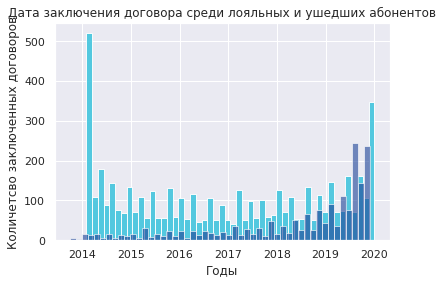

In [36]:
stayed['BeginDate'].hist(bins=50, color='#43c5dd', alpha=0.9)
left['BeginDate'].hist(bins=50, color='#1c4297', alpha=0.6) #в каком году ушедшие заключили договор
plt.ylabel('Количетсво заключенных договоров')
plt.xlabel('Годы')
plt.title('Дата заключения договора среди лояльных и ушедших абонентов')


Многие ушедшие клиенты заключили договор во второй половине 2019 года. Тут хотелось бы задать вопрос бизнесу, возможно это следстие промоакции.

Ежемесячные платежи ушедших клиентов в среднем значительно выше чем у тех, кто остался, в период оттока клиентов эта разница увеличилась. Вероятно клиенты могли утйти в связи с тем, что ситуация на рынке поменялась и можно было заключить договор на более выгодных условиях. Возможно кто-то из них мог перезаключить договор с той же компанией.

Добавлю столбец с определением размера платежа, определю платежи больше на 33%, чем средние для данного года заключения договора как высокие, меньше, как низкие:

In [38]:
# создам два словаря ключем для которого будет уникалное значение года, а значением 0.33 и 0.66 квантиль
BeginYear_quantile33 = {}
BeginYear_quantile66 = {}
for i in res['BeginYear'].unique():
    BeginYear_quantile33[i] = res.query('BeginYear == @i')['MonthlyCharges'].quantile(0.33)
    BeginYear_quantile66[i] = res.query('BeginYear == @i')['MonthlyCharges'].quantile(0.66)
display(BeginYear_quantile33)
BeginYear_quantile66

{2020: 20.3,
 2017: 54.65,
 2019: 45.0,
 2016: 54.022999999999996,
 2018: 49.757,
 2014: 66.9285,
 2015: 59.85,
 2013: 96.93950000000001}

{2020: 45.556,
 2017: 85.2,
 2019: 74.4,
 2016: 85.946,
 2018: 80.507,
 2014: 97.076,
 2015: 92.74800000000002,
 2013: 108.39099999999999}

In [97]:
# функция для определения уровня ежемесячного платежа
def payment_level(row):
    if row['MonthlyCharges'] <= (BeginYear_quantile33[row['BeginYear']]):
        row['PaymentLevel'] = 'L'
    elif row['MonthlyCharges'] > (BeginYear_quantile66[row['BeginYear']]):
        row['PaymentLevel'] = 'H'
    else:
        row['PaymentLevel'] = 'M'
    return row

In [98]:
res = res.apply(payment_level, axis=1)
res.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,leftCompany,AmountOfDays,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TypeService,BeginYear,PaymentLevel
customerID,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0,phone,2020,M
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0.0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,both,2017,M
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1.0,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,both,2019,M
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0,phone,2016,L
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1.0,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,both,2019,M
9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,1.0,245,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,both,2019,H
1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0.0,671,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,both,2018,H
6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,301.90,0.0,306,Female,0,No,No,DSL,Yes,No,No,No,No,No,0,phone,2019,L
7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05,1.0,853,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,both,2017,H


In [99]:
(res['PaymentLevel'].value_counts()) # количество абонетов по новому признаку

H    2389
L    2330
M    2313
Name: PaymentLevel, dtype: int64

## Типы услуг

Рассмотрим, как различаютя выборки по тем услугам, которыми пользуются клиенты

In [100]:
res['TypeService'].value_counts()

both        4832
internet    1520
phone        680
Name: TypeService, dtype: int64

In [101]:
def duo_pie(title_1, vals_1, labels_1, title_2, vals_2, suptitle_1):
    plt.figure(1, figsize=(17,15))
    the_grid = GridSpec(2, 2)
    colors = ['#1c4297', '#006bb3', '#6caee0']
    
    plt.subplot(the_grid[0, 0], aspect=1, title=title_1)
    plt.pie(vals_1.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1), colors=colors)

    plt.subplot(the_grid[0, 1], aspect=1, title=title_2)
    plt.pie(vals_2.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1), colors=colors)
    plt.suptitle(suptitle_1, fontsize=16)

    plt.show()

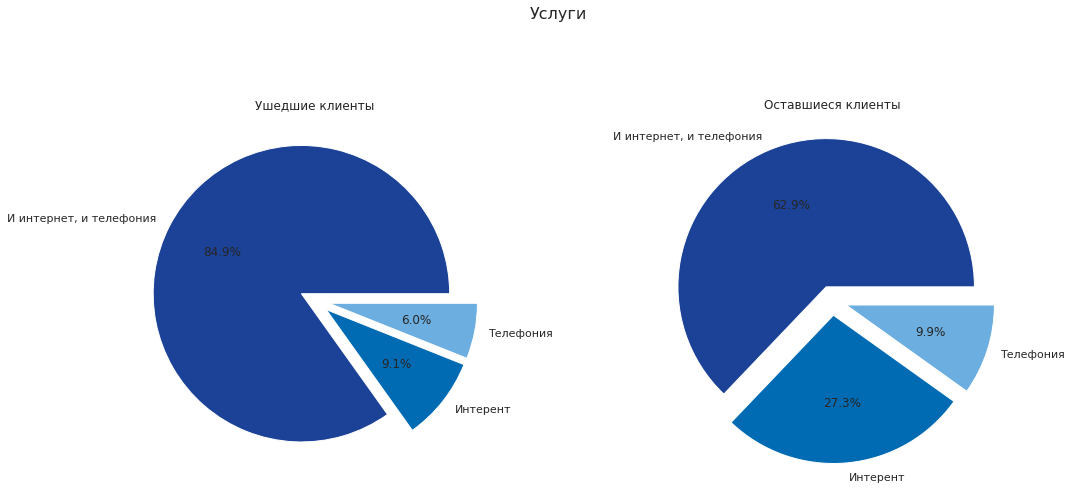

In [102]:
duo_pie('Ушедшиe клиенты', left['TypeService'], ["И интернет, и телефония", "Интерент", "Телефония"], 
        'Оставшиеся клиенты', stayed['TypeService'], 'Услуги')

Большее количество покинувших компанию использовала обе услуги.

##  Тип оплаты за услуги 

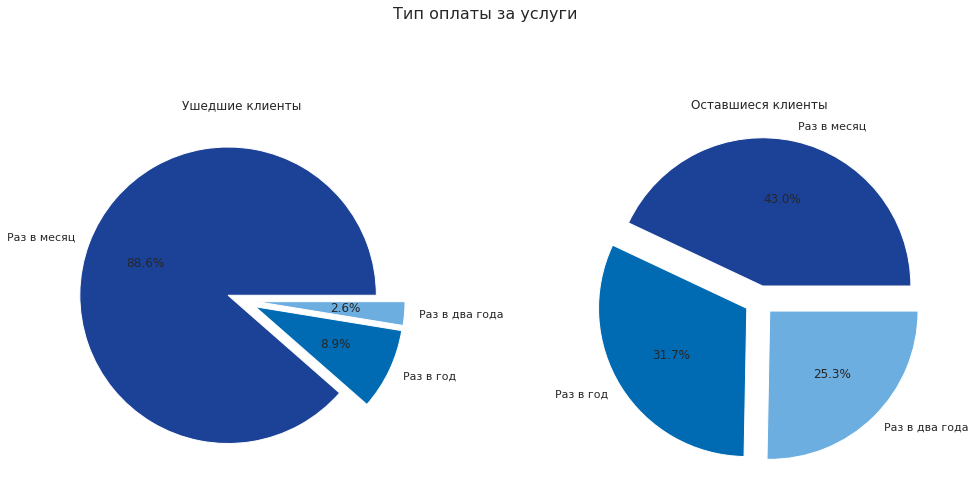

In [103]:
duo_pie('Ушедшиe клиенты', left['Type'], ["Раз в месяц", "Раз в год", "Раз в два года"], 
        'Оставшиеся клиенты', stayed['Type'], 'Тип оплаты за услуги')

Те, кто платят помесячно, имеют больший риск покинуть компанию.

## Способы оплаты 

In [104]:
def duo_pie_4(title_1, vals_1, labels_1, title_2, vals_2, suptitle_1):
    plt.figure(1, figsize=(17,15))
    the_grid = GridSpec(2, 2)
    colors = ['#1c4297', '#006bb3', '#6caee0', '#43c5dd']
    
    plt.subplot(the_grid[0, 0], aspect=1, title=title_1)
    plt.pie(vals_1.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1), colors=colors)

    plt.subplot(the_grid[0, 1], aspect=1, title=title_2)
    plt.pie(vals_2.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1), colors=colors)
    plt.suptitle(suptitle_1, fontsize=16)

    plt.show()

In [105]:
left['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

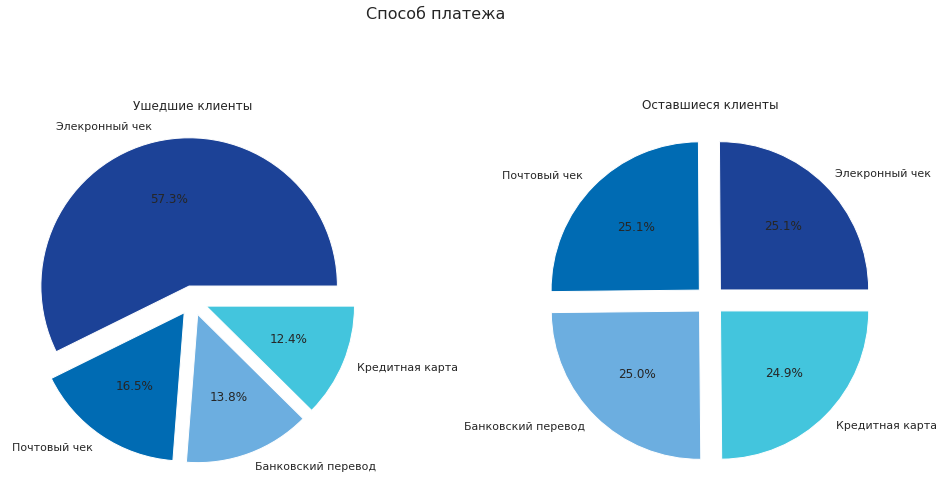

In [106]:
duo_pie_4('Ушедшиe клиенты', left['PaymentMethod'], ["Элекронный чек", "Почтовый чек", "Банковский перевод", 
        'Кредитная карта'], 'Оставшиеся клиенты', stayed['PaymentMethod'], 'Способ платежа')

## Пол и возраст

In [107]:
def duo_pie_2(title_1, vals_1, labels_1, title_2, vals_2, suptitle_1):
    plt.figure(1, figsize=(17,15))
    the_grid = GridSpec(2, 2)
    colors = ['#1c4297', '#43c5dd']
    
    plt.subplot(the_grid[0, 0], aspect=1, title=title_1)
    plt.pie(vals_1.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1), colors=colors)

    plt.subplot(the_grid[0, 1], aspect=1, title=title_2)
    plt.pie(vals_2.value_counts(), labels=labels_1, autopct='%1.1f%%', explode=(0.1, 0.1), colors=colors)
    plt.suptitle(suptitle_1, fontsize=16)

    plt.show()

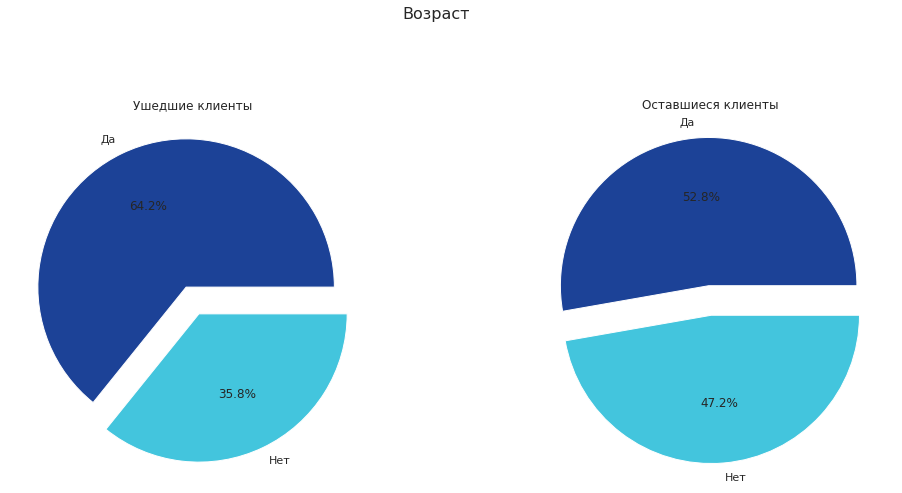

In [108]:
duo_pie_2('Ушедшиe клиенты', left['Partner'], ["Да", "Нет"], 
        'Оставшиеся клиенты', stayed['Partner'], 'Возраст')

Пожилых среди ушедших чуть больше

Посмотрим на гендер

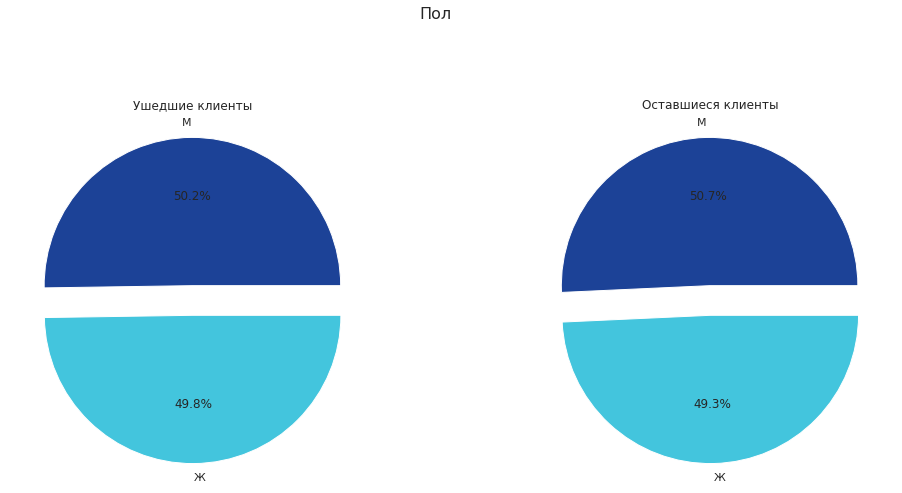

In [109]:
duo_pie_2('Ушедшиe клиенты', left['gender'], ["М", "Ж"], 
        'Оставшиеся клиенты', stayed['gender'], 'Пол')

Гендерное равенство!

## Работающие и безработные

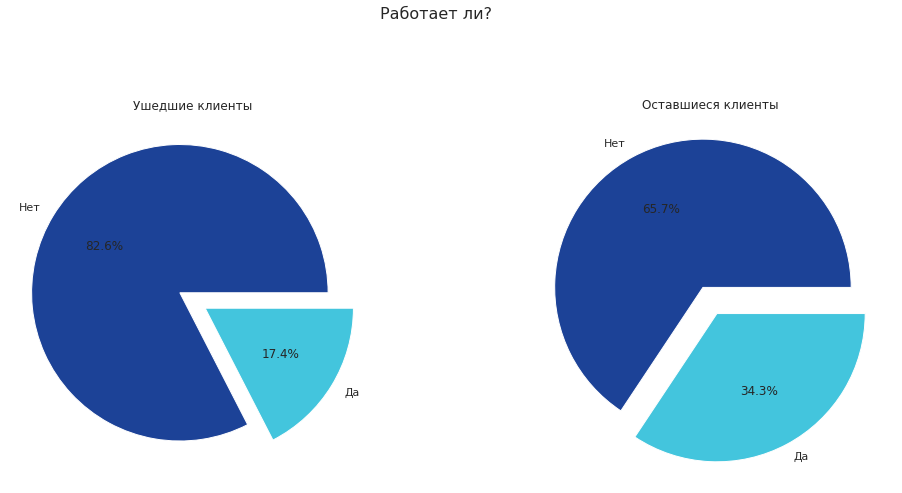

In [110]:
duo_pie_2('Ушедшиe клиенты', left['Dependents'], ["Нет", "Да"], 
        'Оставшиеся клиенты', stayed['Dependents'], 'Работает ли?')

Доля безработных среди ушедших чуть выше.

## Вывод
Компанию покинуло 26% клиентов, произошел отток в течении четырех месяцев. 

Ежемесячные платежи у тех, кто ушел были в среднем выше, а количество дней, которые они были в компании меньше почти втрое. На основании этой находки создала новый признак «PaymentLevel», который показывает соответствует ли ежемесячный платеж среднему для этого года, выше соеднего (более 0,66 квантиля), ниже среднего (менее 0,33 квантиля). 

Потрет клиента.

Ушедшие клиенты в отличии от ставшихся:
- чаще были потребителями комплекта услуг - и интернета, и телефонии (85% против 63%);
- в большинстве случаев платили помесячно (89%), а оставшиеся в компании клиенты чаще имеют тип оплаты один раз в год или один раз в два года;
- чаще использовали электронный чек;
- в большем количестве случаев были пожилыми людьми или безработными.


# Подготовка данных к машинному обучению

## Корреляция признаков

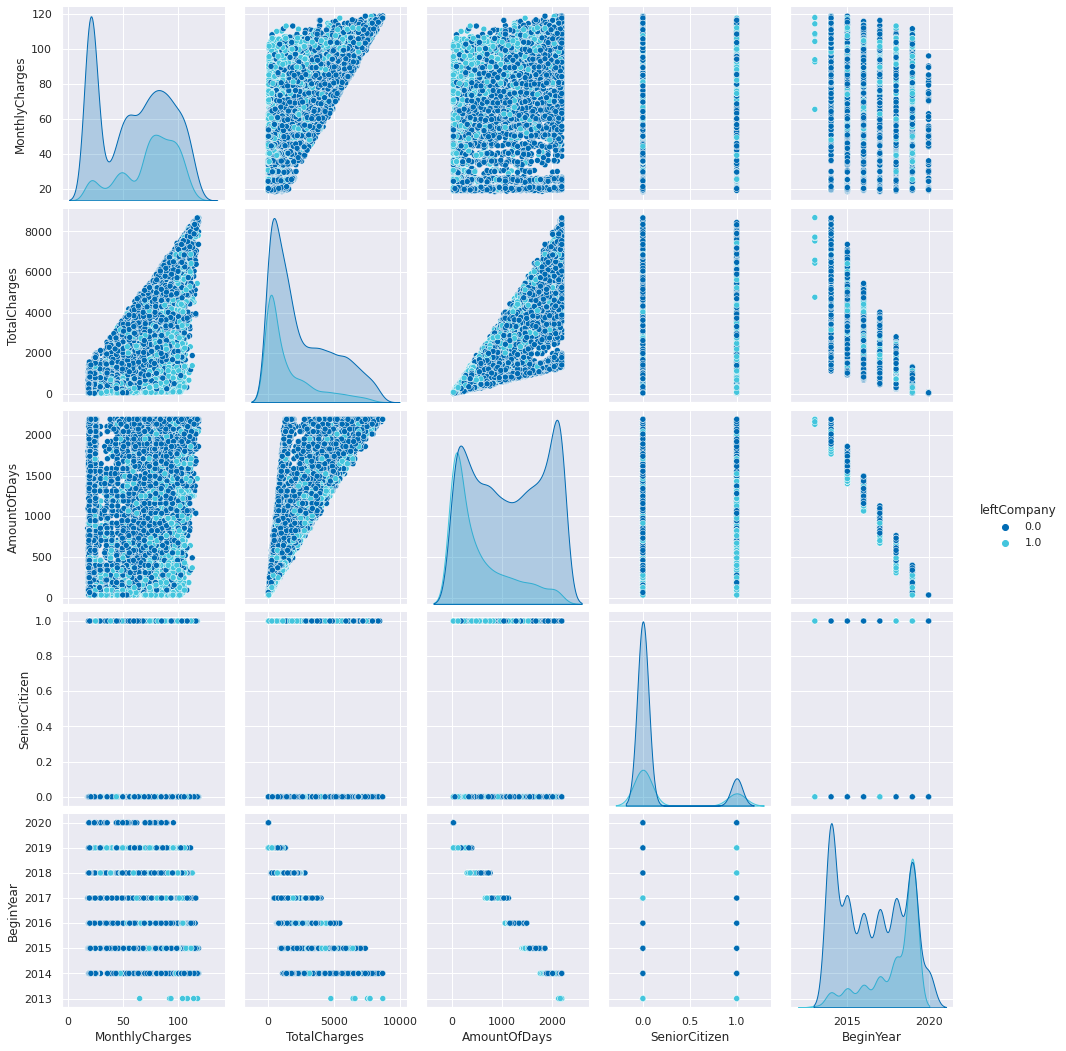

In [111]:
sns.pairplot(res, hue='leftCompany', palette = [ '#006bb3', '#43c5dd']).fig.set_size_inches(15,15)

In [112]:
res.corr()

,MonthlyCharges,TotalCharges,leftCompany,AmountOfDays,SeniorCitizen,BeginYear
MonthlyCharges,1.000000,0.651065,0.192858,0.246715,0.219874,-0.263086
TotalCharges,0.651065,1.000000,-0.199484,0.825811,0.102411,-0.819304
leftCompany,0.192858,-0.199484,1.000000,-0.354496,0.150541,0.293770
AmountOfDays,0.246715,0.825811,-0.354496,1.000000,0.015630,-0.987425
SeniorCitizen,0.219874,0.102411,0.150541,0.015630,1.000000,-0.027386
BeginYear,-0.263086,-0.819304,0.293770,-0.987425,-0.027386,1.000000


<AxesSubplot:>

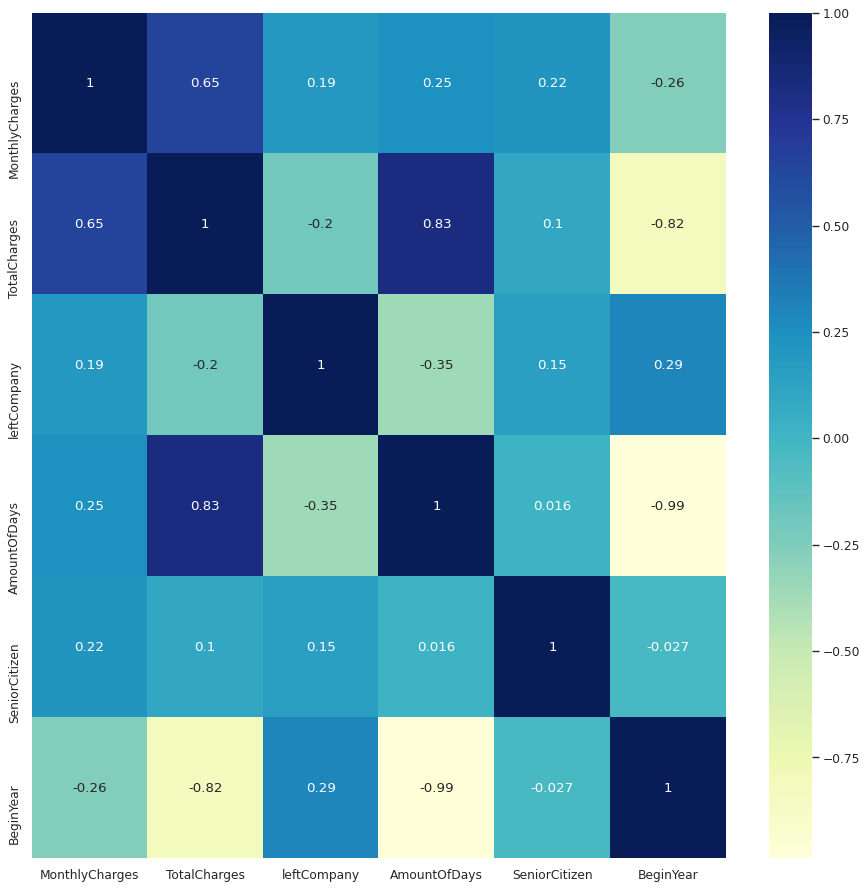

In [113]:
plt.figure(figsize=(14,14), dpi= 80)
sns.heatmap(res.corr(),  cmap='YlGnBu', center=0, annot=True)

Высокую корреляцию имеют стоблцы BeginYear и AmountOfDays, а так же AmountOfDays и TotalCharges.
Удалю столбец 'BeginYear' и 'EndDate'.

In [114]:
res = res.drop(['EndDate','BeginYear', 'BeginDate'],axis=1)
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   leftCompany       7032 non-null   float64
 6   AmountOfDays      7032 non-null   int64  
 7   gender            7032 non-null   object 
 8   SeniorCitizen     7032 non-null   int64  
 9   Partner           7032 non-null   object 
 10  Dependents        7032 non-null   object 
 11  InternetService   7032 non-null   object 
 12  OnlineSecurity    7032 non-null   object 
 13  OnlineBackup      7032 non-null   object 
 14  DeviceProtection  7032 non-null   object 
 15  TechSupport       7032 non-null   object 
 16  StreamingTV       7032 non-null 

## Преобразование категориальных признаков

Преобразую категориальные признаки методом прямого кодирования. чтобы избежать дамми-ловушки, используем аргумент drop_first=True:

In [116]:
res_ohe = pd.get_dummies(res, columns = ['Type', 'PaperlessBilling', 'gender',
       'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'TypeService', 'PaymentLevel', 'PaymentMethod'], drop_first = True)

In [117]:
feature=res_ohe.drop(['leftCompany'],axis=1)
target=res_ohe['leftCompany']

In [118]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=12345)

In [119]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(5625, 33)
(1407, 33)
(5625,)
(1407,)


## Масштабирование признаков

Для масштабирования признаков использую StandardScaler

In [121]:
numeric_features =['MonthlyCharges','TotalCharges', 'AmountOfDays']

scaler = StandardScaler()
scaler.fit(feature_train[numeric_features])

feature_train[numeric_features] = scaler.transform(feature_train[numeric_features])
feature_test[numeric_features] = scaler.transform(feature_test[numeric_features])

Данные подготовлены для обучения. Дисбаланс классов не критический.

# Обучение моделей

Использую модели LogisticRegression,  RandomForestClassifier и LGBMClassifier

Для подбора гиперпараметров будем использовать GridSearchCV, для кросс-валидации при подборе гиперпараметров ShuffleSplit 

In [1223]:
def model_learning(model, parameters):
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=12345)
    grid_model = GridSearchCV(model, parameters, scoring='roc_auc', cv=cv)
    grid_model.fit(feature_train, target_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    return grid_model.best_estimator_

Функция для оценки ROC-AUC

In [1252]:
def test_scoring(model):
    pred_proba_test = model.predict_proba(feature_test)[:, 1]
    pred_test = model.predict(feature_test)
    print('Accuracy: ', round(model.score(feature_test, target_test), 3))
    print('Presicion: ', round(precision_score(target_test, pred_test), 3))
    print('Recall: ', round(recall_score(target_test, pred_test), 3))
    print('AUC-ROC: ', round(roc_auc_score(target_test, pred_proba_test), 3))
    fpr, tpr, thresholds = roc_curve(target_test, pred_proba_test)

    sns.set()
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color='#006bb3')

    plt.plot([0, 1], [0, 1], linestyle='--', color='#44c4dd')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()

Функция для оценки важности признаков

In [1253]:
def feature_importance(model):
    feats = {}
    for feature, importance in zip(feature_train.columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)[:20]
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(font_scale = 5)
    sns.set(color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,25)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
    plt.xlabel('Важность', fontsize=25, weight = 'bold')
    plt.ylabel('Признаки', fontsize=25, weight = 'bold')
    plt.title('Важность признаков', fontsize=25, weight = 'bold')
    display(plt.show())
    display(importances)

## Логистическая регрессия

Лучшая оценка на валидации:  0.8507426301956372
Лучшие гиперпараметры модели на валидации:  {'C': 6.84242105263158}
Лучшая модель:  LogisticRegression(C=6.84242105263158, class_weight='balanced', n_jobs=-1,
                   random_state=12345)
Accuracy:  0.768
Presicion:  0.55
Recall:  0.815
AUC-ROC:  0.856


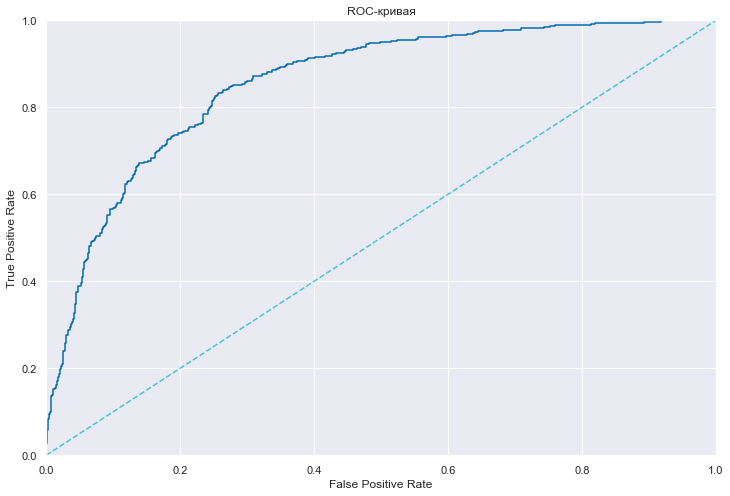

Wall time: 23.9 s


In [1254]:
%%time
lr = LogisticRegression(random_state=12345, n_jobs=-1, class_weight='balanced')
lr_param = {'C' : np.linspace(0.001, 10, 20)}

lr_fitted = model_learning(lr, lr_param)
test_scoring(lr_fitted)

Выведу важность 20 признаков, имеющих наибольшее влияние

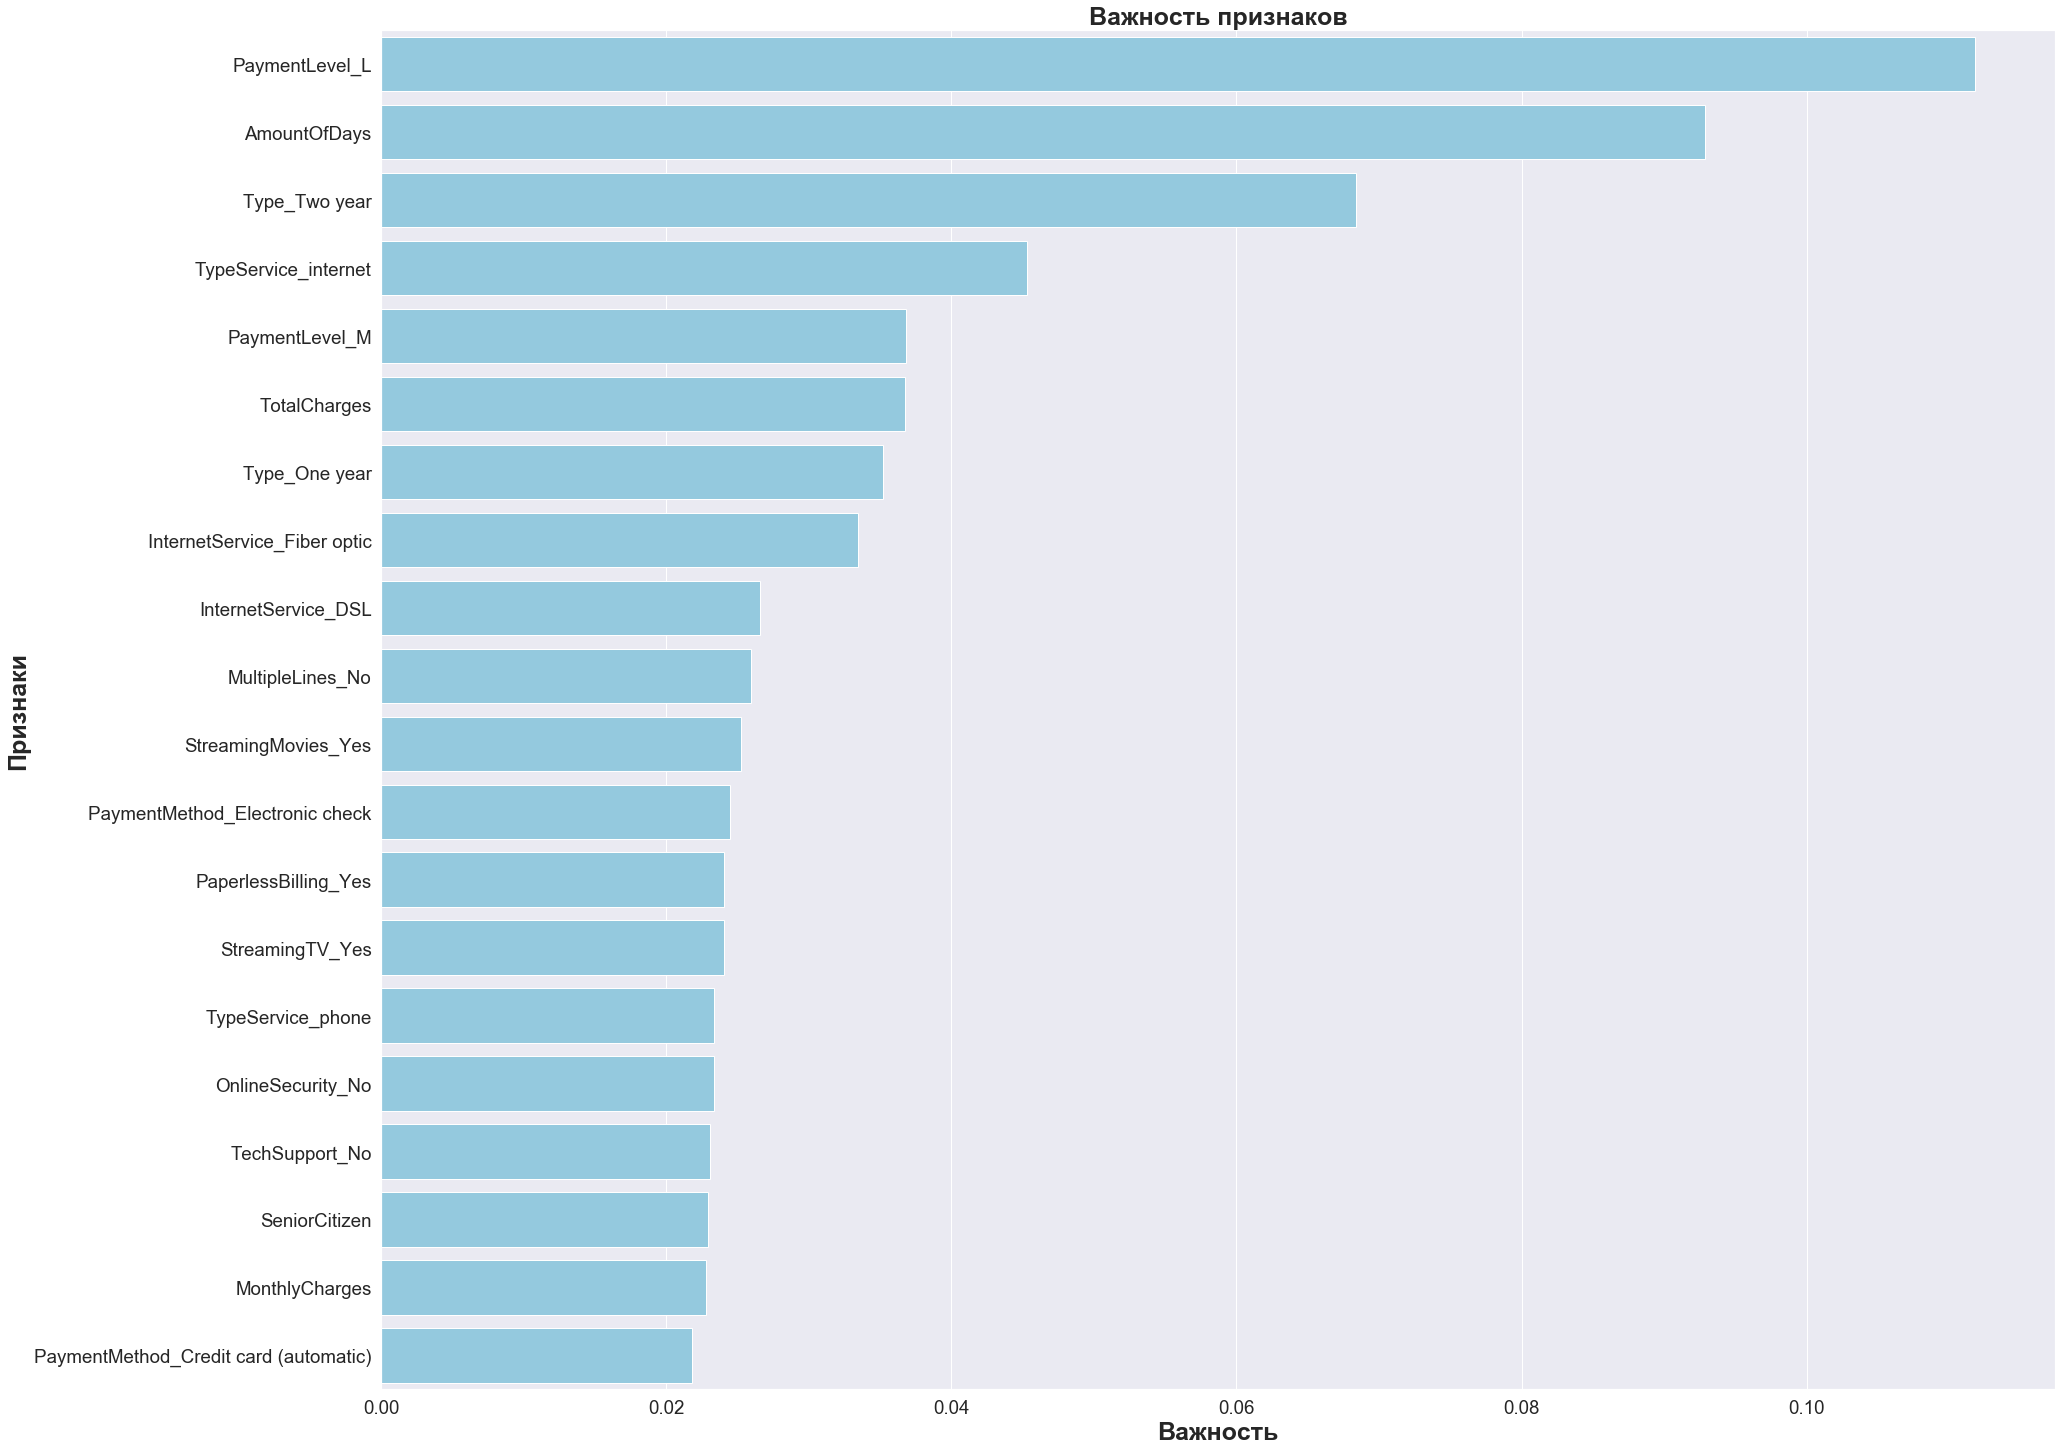

None

,Features,Gini-Importance
0,PaymentLevel_L,0.111842
1,AmountOfDays,0.092869
2,Type_Two year,0.068395
3,TypeService_internet,0.045321
4,PaymentLevel_M,0.036802
5,TotalCharges,0.036747
6,Type_One year,0.035217
7,InternetService_Fiber optic,0.033425
8,InternetService_DSL,0.026548
9,MultipleLines_No,0.025971


In [1231]:
feats = {}
for feature, importance in zip(feature_train.columns, softmax(abs(lr_fitted.coef_))[0]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)[:20]
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,25)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Важность признаков', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Значение целевой метрики для логистической регрессии
AUC-ROC: 0.856
Важнейшие признаки 'AmountOfDays', 'PaymentLevel', 'Type_Two year'.

## Случайный лес

Лучшая оценка на валидации:  0.8618115350878478
Лучшие гиперпараметры модели на валидации:  {'max_depth': 9, 'n_estimators': 411}
Лучшая модель:  RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=411,
                       n_jobs=-1, random_state=12345)
Accuracy:  0.796
Presicion:  0.6
Recall:  0.749
AUC-ROC:  0.872


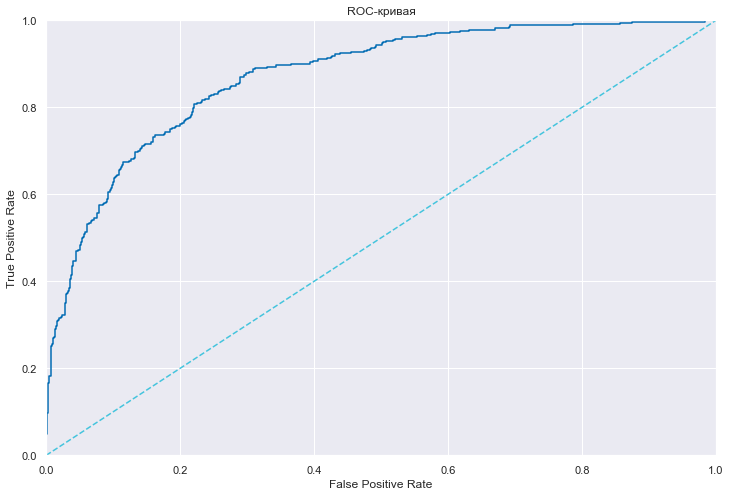

Wall time: 34.5 s


In [1255]:
%%time
rf = RandomForestClassifier(random_state=12345, n_jobs=-1, class_weight='balanced')
rf_param = {'n_estimators': [111, 211, 411],
            'max_depth': range(0, 16, 5),
}

rf_fitted = model_learning(rf, rf_param)
test_scoring(rf_fitted)

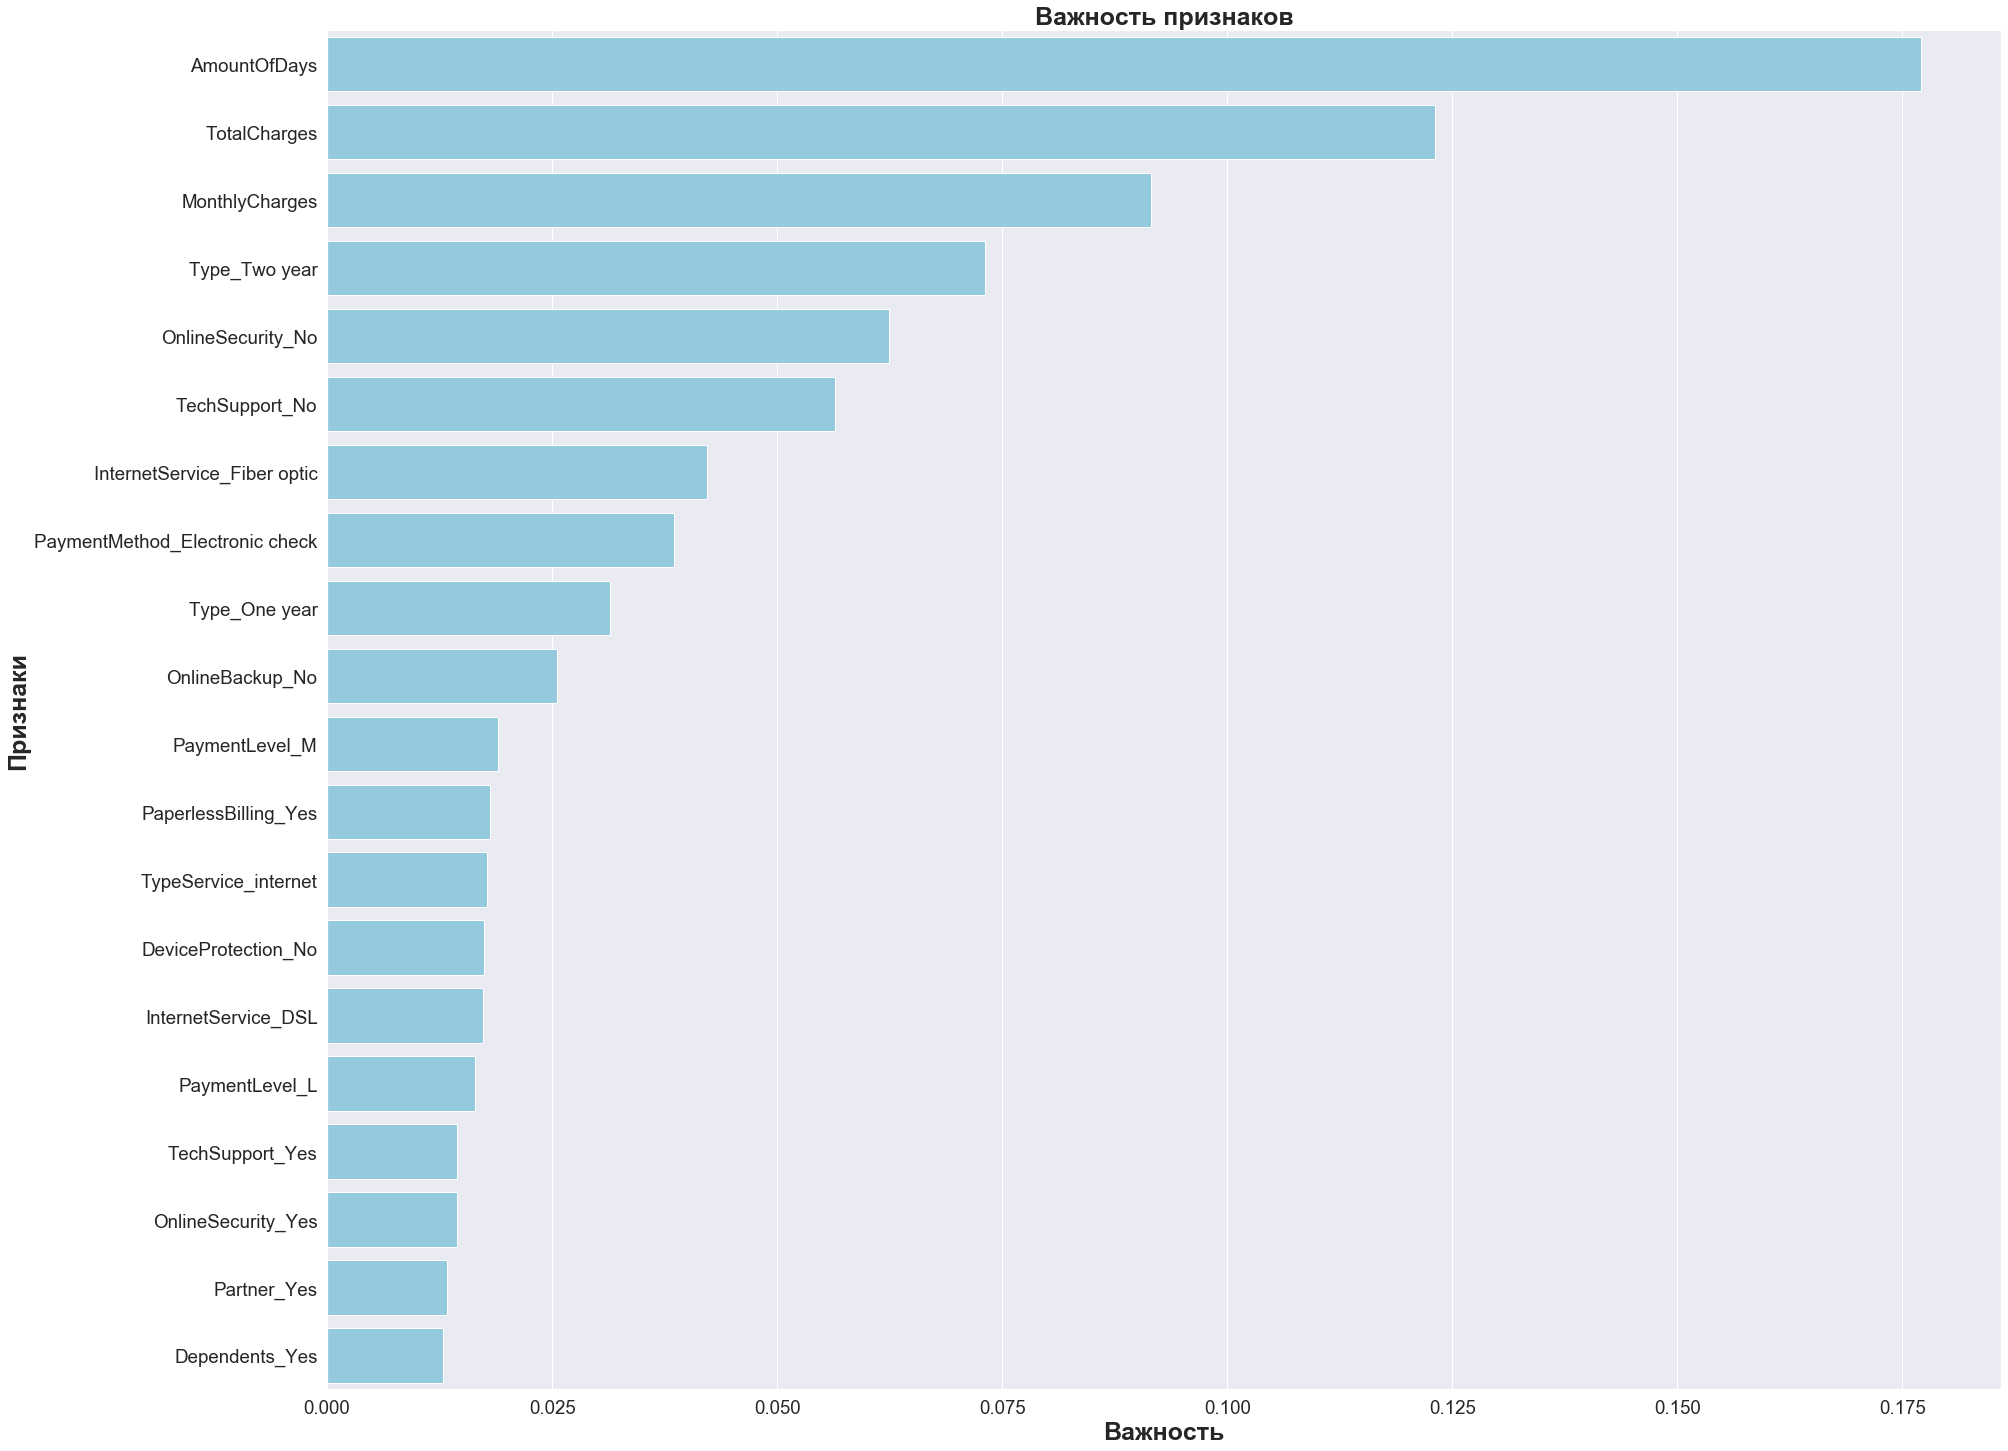

None

,Features,Gini-Importance
0,AmountOfDays,0.177114
1,TotalCharges,0.123106
2,MonthlyCharges,0.091482
3,Type_Two year,0.073065
4,OnlineSecurity_No,0.062397
5,TechSupport_No,0.056472
6,InternetService_Fiber optic,0.042221
7,PaymentMethod_Electronic check,0.038582
8,Type_One year,0.031417
9,OnlineBackup_No,0.025551


In [1243]:
feature_importance(rf_fitted)

Значение целевой метрики для случайного леса
AUC-ROC: 0.872
Важнейшие признаки 'AmountOfDays', 'TotalCharges', 'MonthlyCharges'.

## LGBM

Лучшая оценка на валидации:  0.9235014608093953
Лучшие гиперпараметры модели на валидации:  {'max_depth': 5, 'n_estimators': 800}
Лучшая модель:  LGBMClassifier(class_weight='balanced', max_depth=5, n_estimators=800,
               random_state=12345)
Accuracy:  0.875
Presicion:  0.798
Recall:  0.723
AUC-ROC:  0.931


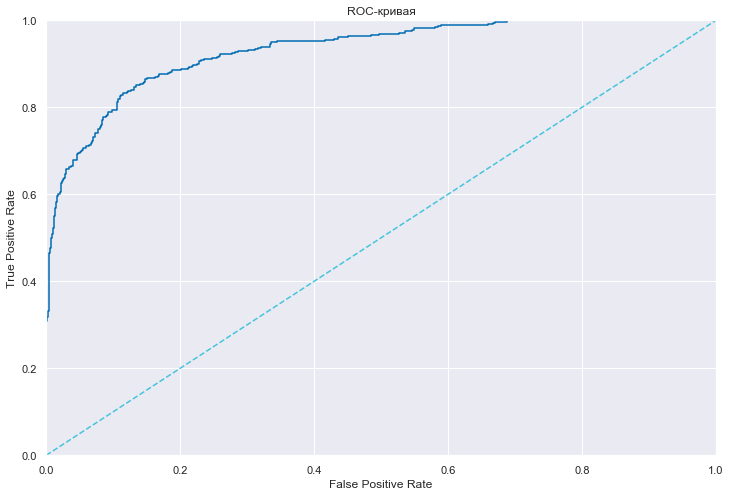

Wall time: 1min 48s


In [1256]:
%%time
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=12345, class_weight='balanced')
lgbm_clf_param = {'n_estimators': range(500, 1000,50),
                  'max_depth':  range(0, 15, 5),
                  }
    
lgbm_clf_fitted = model_learning(lgbm_clf, lgbm_clf_param)
test_scoring(lgbm_clf_fitted)

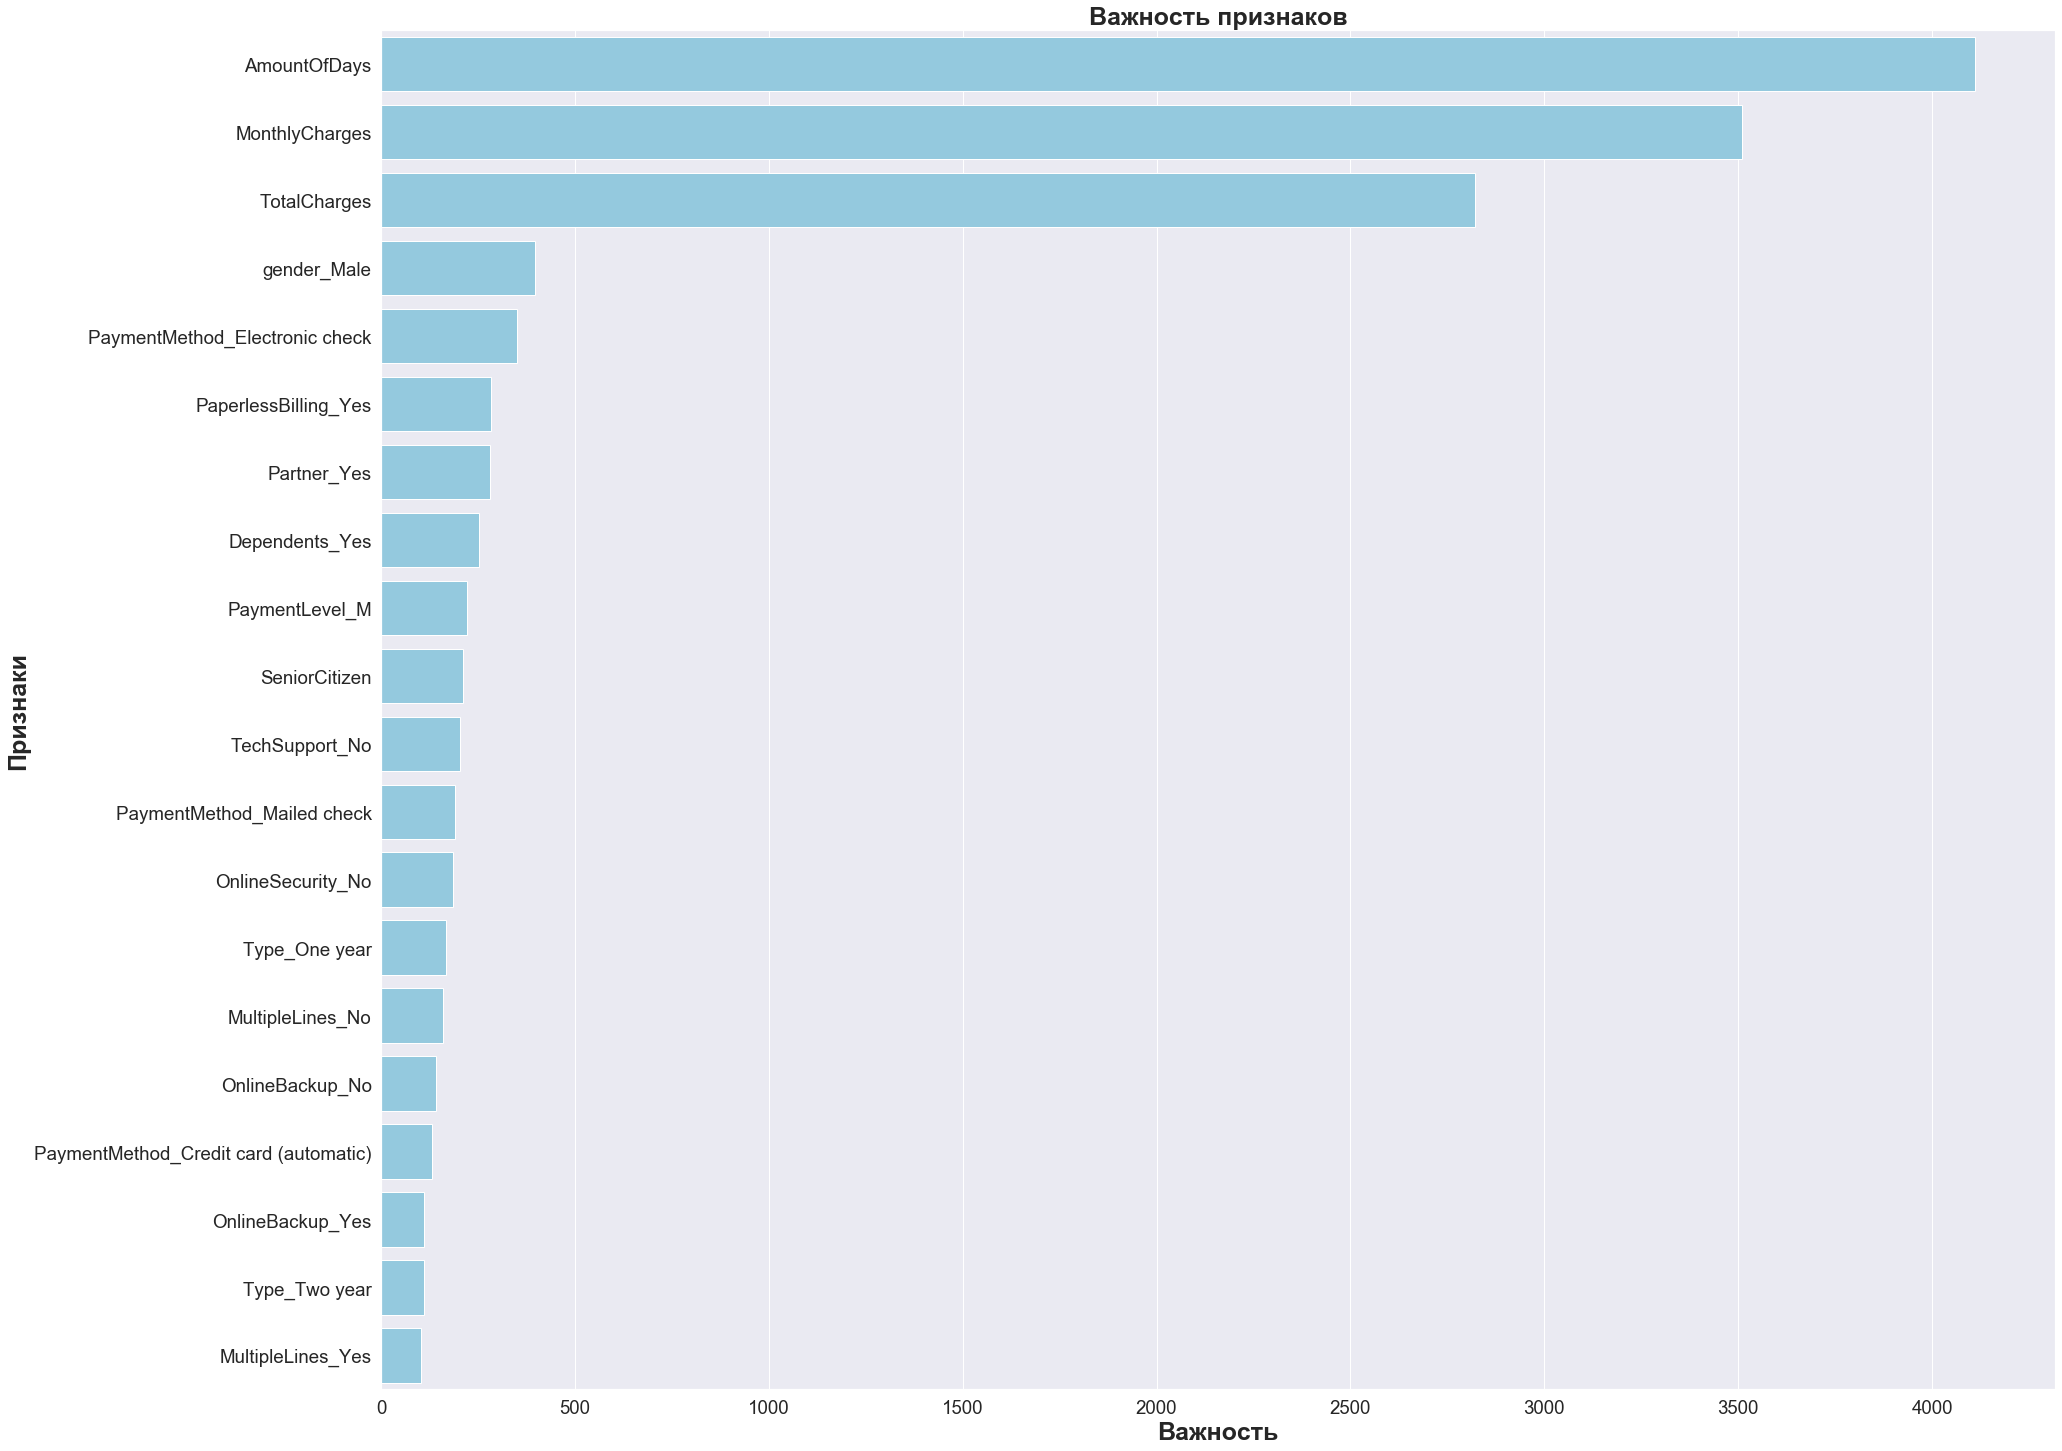

None

,Features,Gini-Importance
0,AmountOfDays,4112
1,MonthlyCharges,3511
2,TotalCharges,2820
3,gender_Male,396
4,PaymentMethod_Electronic check,351
5,PaperlessBilling_Yes,284
6,Partner_Yes,280
7,Dependents_Yes,253
8,PaymentLevel_M,222
9,SeniorCitizen,211


In [1257]:
feature_importance(lgbm_clf_fitted)

Значение целевой метрики для случайного леса
AUC-ROC: 0.931
Важнейшие признаки 'AmountOfDays', 'MonthlyCharges', 'TotalCharges'.

Лучшая модель по указанным метрикам и скорости обучения - LGBM.
Модель показала на тестовой выборке:
Accuracy: 0.873
AUC-ROC: 0.931
Обученная модель полностью справляется с поставленной заказчиком задачи (AUC-ROC >= 0.88)

# Общий вывод

Исследовательский анализ данных позволил определить группы пользователей, которые склонны к уходу. Даже без машинного обучения можно сформировать портреты лояльных и нелояльных клиентов и предпринять упреждающие событию действия, направленые на удержание клиента

Машинное обучение позволяет видеть метрики вероятности ухода клиента. В нашем случае у моделей:

Accuracy: 0.88

AUC-ROC: 0.93

То есть с вероятностью 87% итоговая модель может дать правильный прогноз.

Лучшая модель по указанным метрикам и скорости обучения - LGBM.

Обученная модель полностью справляется с поставленной заказчиком задачи (AUC-ROC >= 0.88)